In [1]:
# coding:utf-8
# 导入需要的模块
import pandas as pd
import numpy as np
from IPython.display import display

# 用来绘图的，封装了matplot
# 要注意的是一旦导入了seaborn，
# matplotlib的默认作图风格就会被覆盖成seaborn的格式
import matplotlib.pyplot as plt
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
sns.set_style({'font.sans-serif':['simhei','Arial']})
warnings.filterwarnings('ignore')

# 为了在jupyter notebook里作图，需要用到这个命令
%matplotlib inline  


# 检查Python版本
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3 来完成此项目')

## 导入数据

In [2]:
# 导入链家房价数据
import sqlite3
import FangjiaUtil

conn = sqlite3.connect("../data/HangZhouFangJia.db")
new_df, data_train = FangjiaUtil.load_data(conn)

## 观察各项主要特征与房屋售价的关系

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 2814 to 3800
Data columns (total 20 columns):
id                 1480 non-null int64
community_name     1480 non-null object
type               130 non-null object
district           1480 non-null object
bizcircle          1480 non-null object
location           1480 non-null object
building_type      1480 non-null object
green_rate         130 non-null float64
volume_rate        130 non-null float64
building_date      1448 non-null datetime64[ns]
days_to_today      1448 non-null float64
room               1480 non-null object
area               1477 non-null float64
orient             1480 non-null object
decoration         1480 non-null object
elevator           1480 non-null object
orig_flood_info    1480 non-null object
flood              1480 non-null object
total_flood        1480 non-null object
total_price        1480 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(13)
memory usage: 242.8+ 

In [4]:
data_train['total_price_per_mm'] = data_train['total_price']/data_train['area']
data_train['total_price_per_mm'].describe()

count      1477.000000
mean      38077.873591
std       13756.763804
min           1.997388
25%       28000.000000
50%       37548.813457
75%       45692.633456
max      123425.044999
Name: total_price_per_mm, dtype: float64

In [5]:
data_train=data_train[data_train['total_price_per_mm'].notna()]

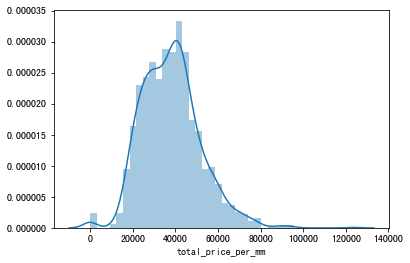

In [6]:
sns.distplot(data_train['total_price_per_mm'].astype(int))

可以看到与使用matplotlib作的直方图最大的区别在于有一条密度曲线（KDE），可以通过设置参数去掉这条默认的曲线。 另外由上图可以知道房价呈现正态分布。下面还可以看到两个统计学中的概念： 峰度（Kurtosis）和 偏度（Skewness）。

    峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。

    它是和正态分布相比较的。

    Kurtosis=0 与正态分布的陡缓程度相同。

    Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰

    Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 偏度：

    偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。

    Skewness=0 分布形态与正态分布偏度相同
    Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
    Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

In [7]:
#skewness and kurtosis
print("Skewness: %f" % data_train['total_price_per_mm'].skew())
print("Kurtosis: %f" % data_train['total_price_per_mm'].kurt())

Skewness: 0.642036
Kurtosis: 1.584750


In [8]:
data_train.head()

,id,community_name,type,district,bizcircle,location,building_type,green_rate,volume_rate,building_date,days_to_today,room,area,orient,decoration,elevator,orig_flood_info,flood,total_flood,total_price,total_price_per_mm
2814,2561,一清新村,None,拱墅,湖墅,(拱墅湖墅)文一路15号,板楼,NaN,NaN,1996-01-01,-8492.0,2室1厅,50.00,南,简装,无电梯,高楼层(共6层)1997年建板楼 -,高楼层,6,2300000.0,46000.000000
2696,2452,丁桥兰苑,None,江干,丁桥,(江干丁桥)惠兰雅路58号,板楼,NaN,NaN,2000-01-01,-7031.0,2室2厅,83.47,南,毛坯,有电梯,高楼层(共11层)2000年建板楼 -,高楼层,11,2050000.0,24559.722056
4611,4092,丁桥大唐苑,None,江干,丁桥,(江干丁桥)蕙兰雅路丁桥大唐苑,板楼,NaN,NaN,2012-01-01,-2648.0,4室2厅,126.68,南,简装,无电梯,低楼层(共6层)2012年建板楼 -,低楼层,6,2800000.0,22102.936533
1260,1134,丁桥家苑,None,江干,丁桥,(江干丁桥)惠兰雅路267号,板楼,NaN,NaN,2008-01-01,-4109.0,3室2厅,103.62,南,毛坯,无电梯,低楼层(共6层)2008年建板楼 -,低楼层,6,2550000.0,24609.148813
136,115,丁桥景园北苑,None,江干,丁桥,(江干丁桥)勤丰路25号,板楼,NaN,NaN,2000-01-01,-7031.0,2室2厅,83.25,南 北,简装,有电梯,中楼层(共15层)2000年建板楼 -,中楼层,15,2100000.0,25225.225225


In [9]:
# 别墅数据结构不同，数据错位。除去别墅数据
display(data_train[data_train['elevator']=='毛坯'])
data_train = data_train[data_train['elevator']!='毛坯']

,id,community_name,type,district,bizcircle,location,building_type,green_rate,volume_rate,building_date,days_to_today,room,area,orient,decoration,elevator,orig_flood_info,flood,total_flood,total_price,total_price_per_mm


### 验证主要特征是否满足要求

In [10]:
a4_dims = (16, 9)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 2814 to 3800
Data columns (total 21 columns):
id                    1477 non-null int64
community_name        1477 non-null object
type                  128 non-null object
district              1477 non-null object
bizcircle             1477 non-null object
location              1477 non-null object
building_type         1477 non-null object
green_rate            128 non-null float64
volume_rate           128 non-null float64
building_date         1445 non-null datetime64[ns]
days_to_today         1445 non-null float64
room                  1477 non-null object
area                  1477 non-null float64
orient                1477 non-null object
decoration            1477 non-null object
elevator              1477 non-null object
orig_flood_info       1477 non-null object
flood                 1477 non-null object
total_flood           1477 non-null object
total_price           1477 non-null float64
total_price_per_mm   

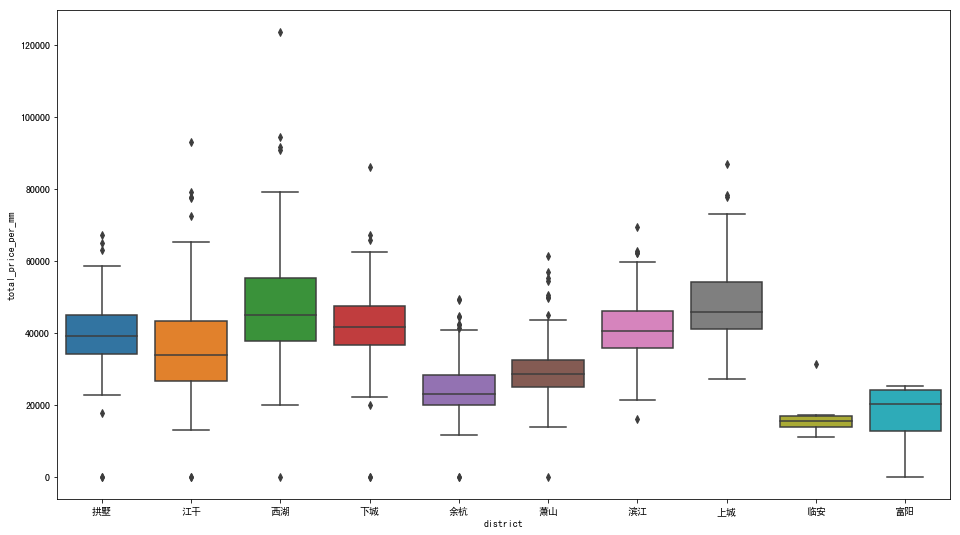

In [11]:
# district
var = 'district'
data = pd.concat([data_train['total_price_per_mm'], data_train[var]], axis=1)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.boxplot(x=var, y="total_price_per_mm", data=data)

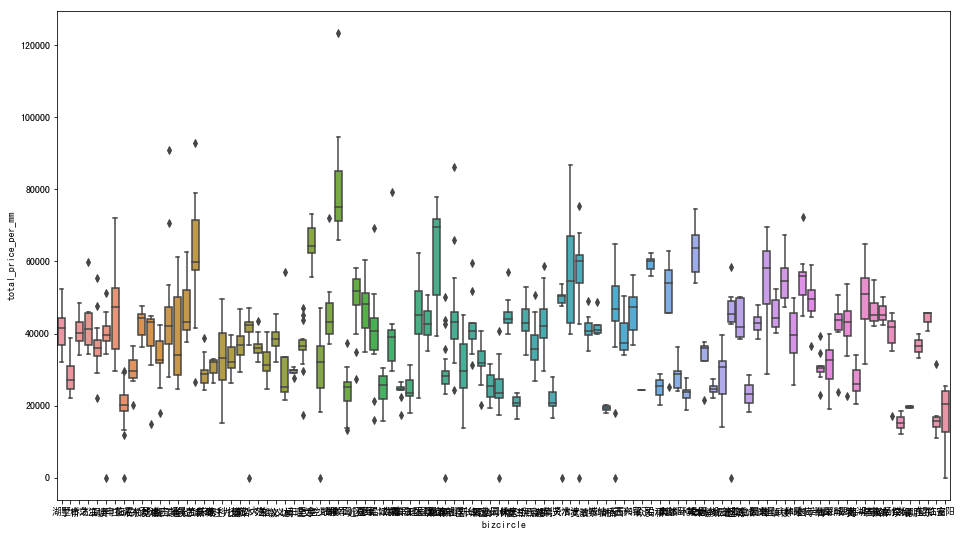

In [12]:
# bizcircle
var = 'bizcircle'
data = pd.concat([data_train['total_price_per_mm'], data_train[var]], axis=1)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.boxplot(x=var, y="total_price_per_mm", data=data)

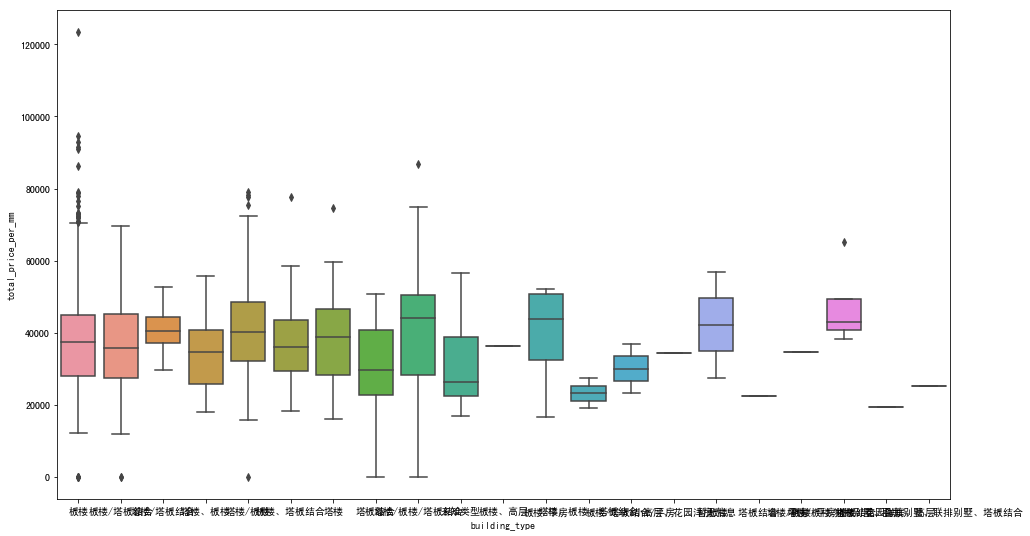

In [13]:
# building_type
var = 'building_type'
data = pd.concat([data_train['total_price_per_mm'], data_train[var]], axis=1)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.boxplot(x=var, y="total_price_per_mm", data=data)

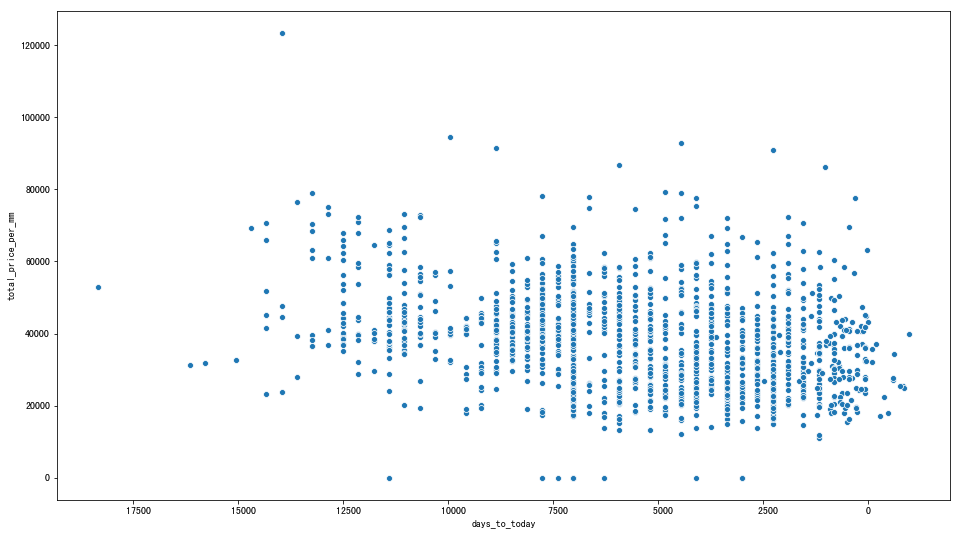

In [14]:
# days_to_today
var = 'days_to_today'
data = pd.concat([data_train['total_price_per_mm'], data_train[var]], axis=1)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.scatterplot(x=var, y="total_price_per_mm", data=data)

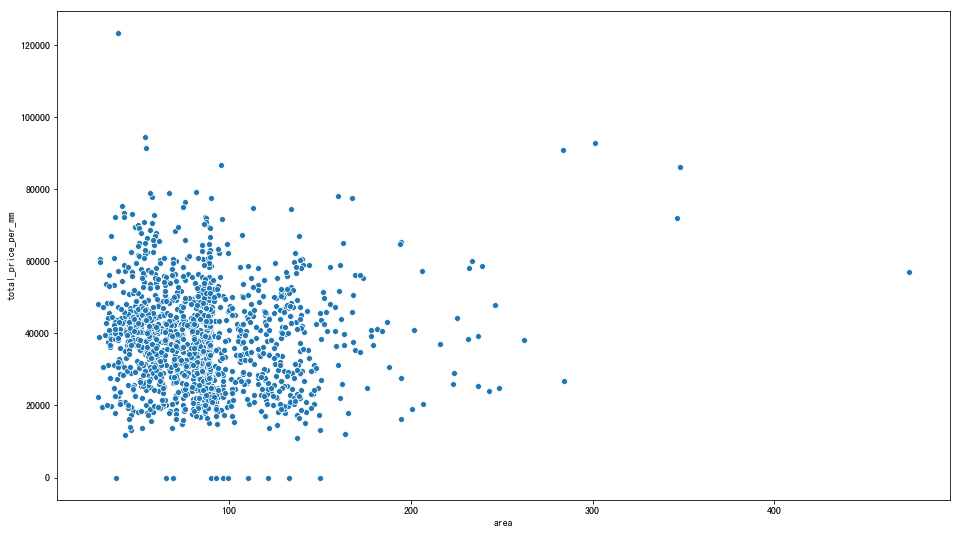

In [20]:
# area
var = 'area'
data = pd.concat([data_train['total_price_per_mm'], data_train[var]], axis=1)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.scatterplot(x=var, y="total_price_per_mm", data=data)

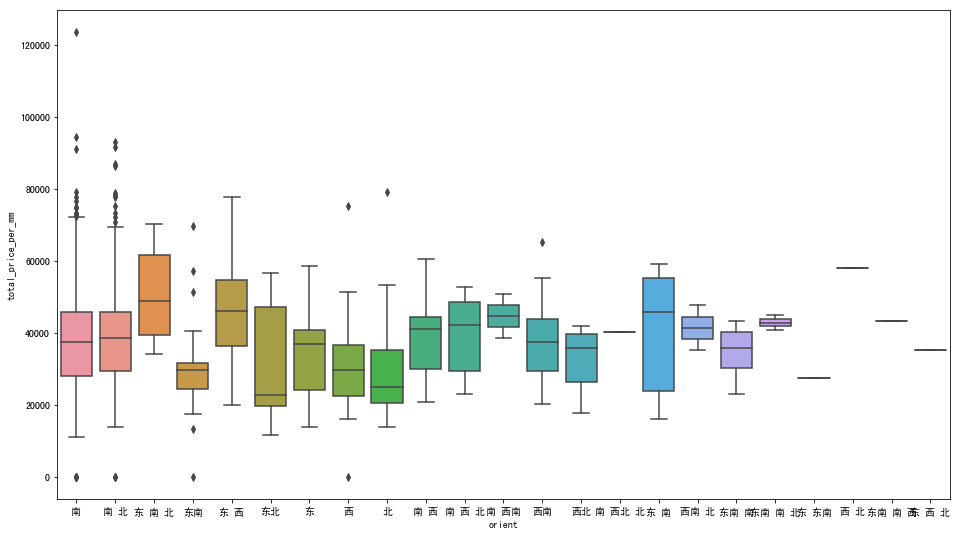

In [16]:
# orient
var = 'orient'
data = pd.concat([data_train['total_price_per_mm'], data_train[var]], axis=1)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.boxplot(x=var, y="total_price_per_mm", data=data)

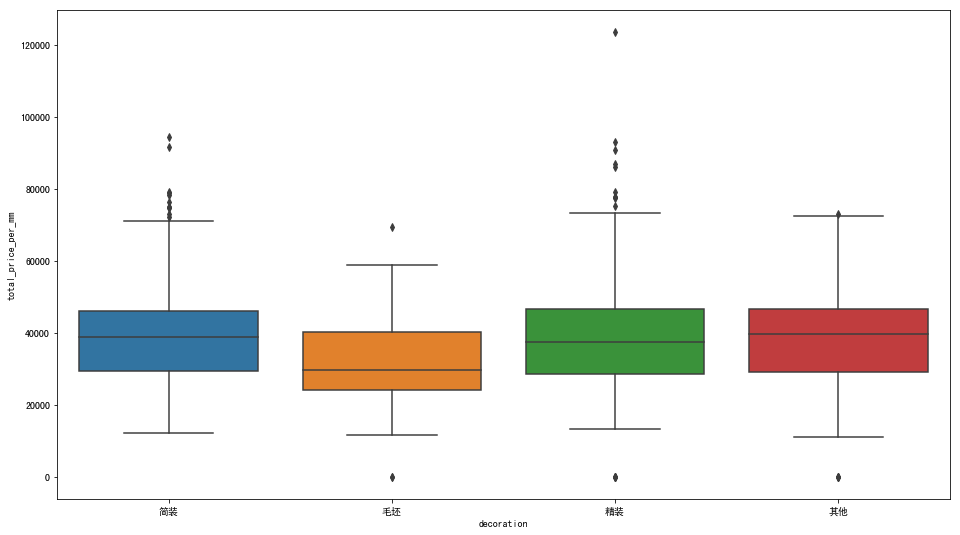

In [17]:
# decoration
var = 'decoration'
data = pd.concat([data_train['total_price_per_mm'], data_train[var]], axis=1)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.boxplot(x=var, y="total_price_per_mm", data=data)

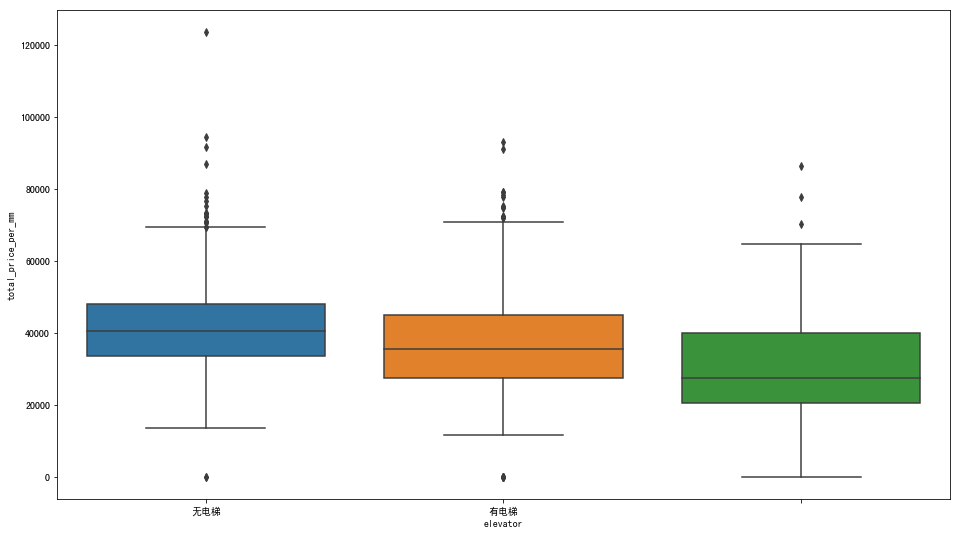

In [18]:
# elevator
var = 'elevator'
data = pd.concat([data_train['total_price_per_mm'], data_train[var]], axis=1)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.boxplot(x=var, y="total_price_per_mm", data=data)

### 关系矩阵

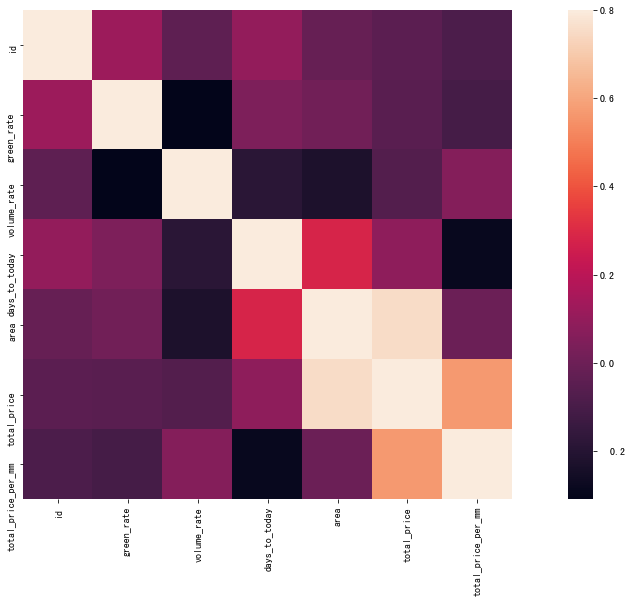

In [19]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)